#**UNIDAD 1. HERRAMIENTAS DE ESTADÍSTICA Y PROBABILIDAD EN EL NEGOCIO BANACARIO**

# Base de datos

Trabajaremos con la Base de datos Banco

In [ ]:
#Importo las librerias que voy a necesitar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import statistics as stat
import scipy.stats as st
from statistics import stdev


In [ ]:
#Conecto con el Drive de donde voy a leer el archivo
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/BaseParaTrayecto3.ipynb")

NameError: ignored

In [ ]:
data.dtypes #filas, columnas

En python, los tipos de datos se sintetizan en:
  

1.   Numéricos

*   float: numeros con decimales
*   Integer: numeros enteros

2.   Categóricos

*   String: cadenas

# Organización y resumen de datos

**Tabla para datos categóricos**

Resumimos los datos de la variable Región mediante una tabla de distribución de frecuencias


In [ ]:
tabla_frec_region18=pd.value_counts(data.region18).to_frame().reset_index()
tabla_frec_region18.columns= ("Region","fa")
tabla_frec_region18

,Region,fa
0,B,199
1,C,31
2,A,20


Frecuencias absolutas: cantidad de veces que se repite cada valor de la variable.

In [ ]:
fr=(data.region18.value_counts()/len(data.region18))*100
lis=fr.values
tabla_frec_region18["fr"]=lis
tabla_frec_region18

,Region,fa,fr
0,B,199,79.6
1,C,31,12.4
2,A,20,8.0


Frecuencias relativas: proporción de veces que se repite cada valor de la variable

La variable Región presenta categorias expresadas en escala nominal, por lo que no tiene sentido calcular frecuencias acumuladas.
Cuando la escala es ordinal, las categorías indican un cierto orden en relación al nivel y se pueden obtener frecuencias aboslutas o relativas acumuladas, si lo que queremos saber es cantidad o proporción de elementos hasta cierta categoría en particular.

**> Graficos para variables categoricas**



Diagrama circular: se representa en el círculo el 100% de los casos relevados y las porciones o divisiones se hacen en función a las frecuencias absolutas o relativas.

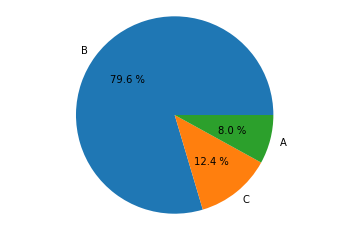

In [ ]:
#Usamos la libreria Matplotlib
import matplotlib.pyplot as plt

fr = [199,31,20]
nombres = ["B","C","A"]
plt.pie(fr, labels=nombres, autopct="%0.1f %%")
plt.axis("equal")
plt.show()


Gráfico de barras: cada una de ellas representa una categoría (en el ejemplo, una región) y la altura de cada barra la frecuencia correspondiente (absoluta o relativa).

No handles with labels found to put in legend.


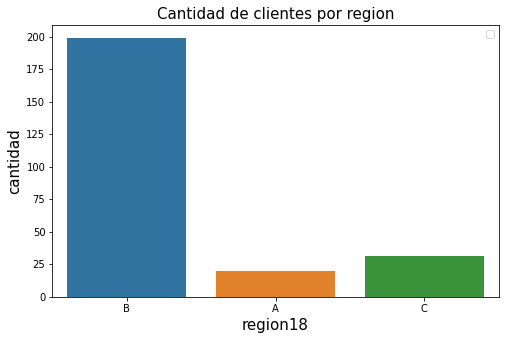

In [ ]:
plt.figure(figsize=(8,5)) # elijo el tamaño de mi gráfica
sn.countplot(data=data, x='region18')
plt.ylabel('cantidad',size=15)
plt.xlabel('region18', size=15)
plt.title('Cantidad de clientes por region', size=15)
plt.legend()

**Tabla para datos numéricos  discretos**

Resumiremos los datos de la variable Cantidad de productos que el cliente tiene contratados con el banco mediante una tabla de distribución de frecuencias.

In [ ]:
tabla_frec_cantprod=pd.value_counts(data.prod18).to_frame().reset_index()
tabla_frec_cantprod.columns= ("Cantidad de productos","fa")
tabla_frec_cantprod

,Cantidad de productos,fa
0,1,89
1,2,83
2,3,46
3,4,25
4,5,6
5,6,1


In [ ]:
#Agrego las frecuencias relativas

fr=(data.prod18.value_counts()/len(data.prod18))*100
lis=fr.values
tabla_frec_cantprod["fr"]=lis
tabla_frec_cantprod

,Cantidad de productos,fa,fr
0,1,89,35.6
1,2,83,33.2
2,3,46,18.4
3,4,25,10.0
4,5,6,2.4
5,6,1,0.4


In [ ]:
from pickle import FALSE
#obtengo las frecuencias acumuladas
# para eso armamos una funcion que me acumule los valores
Fa=tabla_frec_cantprod["fa"].values

a=[]
b=0
for c in Fa:
  b=c+b
  a.append(b)

In [ ]:
tabla_frec_cantprod["Faa"]=a
tabla_frec_cantprod

,Cantidad de productos,fa,fr,Faa
0,1,89,35.6,89
1,2,83,33.2,172
2,3,46,18.4,218
3,4,25,10.0,243
4,5,6,2.4,249
5,6,1,0.4,250


In [ ]:
#Hacemos lo mismo con frecuencias relativas acumuladas
fra=tabla_frec_cantprod["fr"].values
a=[]
b=0
for c in fra:
  b=c+b
  a.append(b)

tabla_frec_cantprod["Fra"]=a
tabla_frec_cantprod

,Cantidad de productos,fa,fr,Faa,Fra
0,1,89,35.6,89,35.6
1,2,83,33.2,172,68.8
2,3,46,18.4,218,87.2
3,4,25,10.0,243,97.2
4,5,6,2.4,249,99.6
5,6,1,0.4,250,100.0


En este caso si tienen sentido las frecuencias relativas. Por ejemplo la Faa de 218 indica que 218 clientes tienen 3 productos o menos. El 97,2% tienen 4 productos o menos (Fra).

**Gráfico para variables numéricas discretas**


Gráfico de bastones: un bastón por valor de la variable y altura proporcional a la frecuencia (absoluta o relativa).

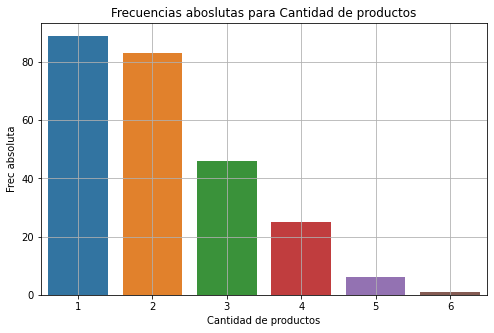

In [ ]:
#grafico de bastones
plt.figure(figsize=(8,5)) # elijo el tamaño de mi gráfica
sn.countplot(data=data, x='prod18')
plt.ylabel('Frec absoluta')
plt.xlabel('Cantidad de productos')
plt.title('Frecuencias aboslutas para Cantidad de productos')
#plt.legend()
plt.grid(True)  #quiero poner grilla
#ver si es necesario agregarle la etiqueta.


**Tablas de frecuencias para variables numéricas continuas**

En el caso de variables numéricas continuas en necesario agrupar los datos en intervalos de clase. Esto también puede ser necesario en el caso de variables numéricas discretas que asumen muchos valores distintos. Analicemos la variable Rentailidad anual 2018 en %:

In [ ]:
data["Rentabilidad agrupada"] = pd.cut(data["rent18"], bins=6)

(data.groupby("Rentabilidad agrupada")
  .agg(frequency=("rent18", "count")))

,frequency
Rentabilidad agrupada,
"(-191.915, 296.833]",207
"(296.833, 782.667]",32
"(782.667, 1268.5]",9
"(1268.5, 1754.333]",1
"(1754.333, 2240.167]",0
"(2240.167, 2726.0]",1


**Gráfico para variables numéricas continuas**


El Histograma es el gráfico adecuados para reresentar frecuencias absolutas o relativas simples en distribuciones por intervalo. Está formado por rectángulos o barras que desde el eje de las abscisas, donde se han marcado previamente, en una escala numérica, los límites de cada intervalo de clase. La altura de cada una de las barras, que se registra en el eje de las ordenadas, se determina de manera que su área sea proporcional a la frecuencia de cada clase.

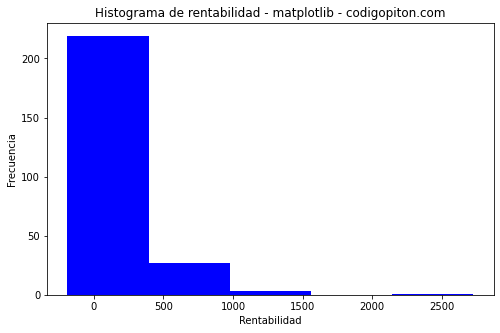

In [ ]:
plt.figure(figsize=(8,5))
intervalos = range(min(data.rent18), max(data.rent18) + 2) #calculamos los extremos de los intervalos
plt.hist(data=data, x='rent18', bins=5, color='blue', rwidth=1) #bins indica el número de barras y rwidth el ancho de la barra en porcentaje.
plt.title('Histograma de rentabilidad - matplotlib - codigopiton.com')
plt.xlabel('Rentabilidad')
plt.ylabel('Frecuencia')
plt.xticks()
plt.show()

**Análisis para dos variables categóricas**

**Tablas bidimensionales o de contingencia**

In [ ]:
# tabla de contingencia frecuencias relativas (base total de observaciones)
pd.crosstab(index=data['region18'], columns=data['online18'],
            margins=True).apply(lambda r: r/len(data) #*100
                                ,axis=1)

online18,0,1,All
region18,,,
A,0.052,0.028,0.080
B,0.416,0.380,0.796
C,0.052,0.072,0.124
All,0.520,0.480,1.000


In [ ]:
# Tabla de contingencia Variables Región y uso de servicios on line
#pd.crosstab(index=data1['Categ'], columns=data1['Satisf'], margins=True)
pd.crosstab(index=data['region18'], columns=data['online18'], margins=True)

online18,0,1,All
region18,,,
A,13,7,20
B,104,95,199
C,13,18,31
All,130,120,250


In [ ]:
# tabla de contingencia condicionadas por fila
# EXPLICACIÓN: EL 65% DE LOS CLIENTES DE LA REGION A NO USA SERVICIOS EN LINEA
pd.crosstab(index=data['region18'], columns=data['online18'],
            margins=True, normalize='index')

online18,0,1
region18,,
A,0.650000,0.350000
B,0.522613,0.477387
C,0.419355,0.580645
All,0.520000,0.480000


In [ ]:
# tabla de contingencia condicionadas por columna
# DENTRO DE LOS CLIENTES QUE NO USAN SERVICIO EN LINEA, EL 80% ESTÁ EN LA ZONA B
pd.crosstab(index=data['region18'], columns=data['online18'],
            margins=True, normalize='columns')

online18,0,1,All
region18,,,
A,0.1,0.058333,0.080
B,0.8,0.791667,0.796
C,0.1,0.150000,0.124


**Gráficos para dos variables categóricas**

Para el análisis de dos variables categóricas en forma conjunta podemos usar un gráfico de barras agrupadas o uno de barras apiladas. Ambos muestran la misma información de difente manera.

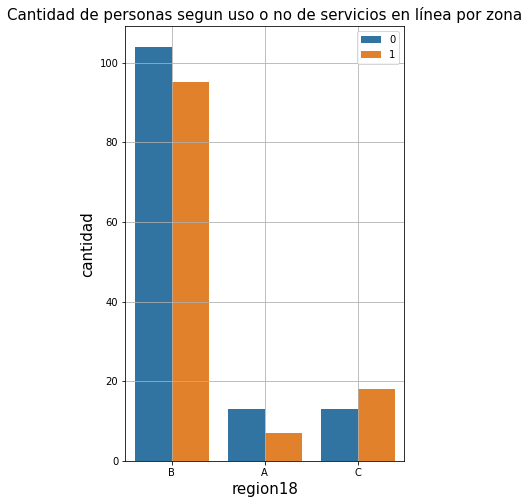

In [ ]:
#Puedo necesitar agrupar por alguna variable de interes
#Gráfico de barras agrupadas
plt.figure(figsize=(5,8)) # elijo el tamaño de mi gráfica
sn.countplot(data=data, x='region18', hue='online18')
plt.ylabel('cantidad',size=15)
plt.xlabel('region18',size=15)
plt.title('Cantidad de personas segun uso o no de servicios en línea por zona',size=15)
plt.legend()
plt.grid(True)  #Para poner grilla

<Figure size 576x360 with 0 Axes>

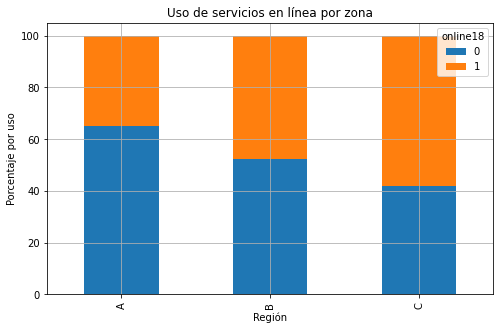

In [ ]:
#Gráfico de barras apiladas
plt.figure(figsize=(8,5)) # elijo el tamaño de mi gráfica
pd.crosstab(index=data['region18'],
            columns=data['online18']
                  ).apply(lambda r: r/r.sum()*100,
                          axis=1).plot(kind='bar', stacked=True,figsize=(8,5))
plt.title("Uso de servicios en línea por zona")
plt.xlabel("Región")
plt.ylabel("Porcentaje por uso")
plt.legend
plt.grid(True)

# Cálculo e interpretación de medidas descriptivas.

**Medidas de posición centrales**

**Media aritmética**

In [ ]:
#Cálculo de la media aritmetica para una variable edad utilizando pandas
data['edad18'].mean()

43.812

In [ ]:
#Cálculo de la media aritmetica para una variable particular utilizando numpy
np.mean(data['edad18'])

43.812

La edad promedio de los clientes es de 43,812 años

In [ ]:
#Calculo medias segun algun variable de segmentacion

data[data.region18 == 'A'].edad18.mean() # Media de la edad para la región A

43.45

In [ ]:
data[data.region18 == 'B'].edad18.mean() # Media de la edad para la región B

44.42713567839196

In [ ]:
data[data.region18 == 'C'].edad18.mean() # Media de la edad para la región C

40.096774193548384

La edad promedio de los clientes es menor en la región C, con un valor de 40 años.

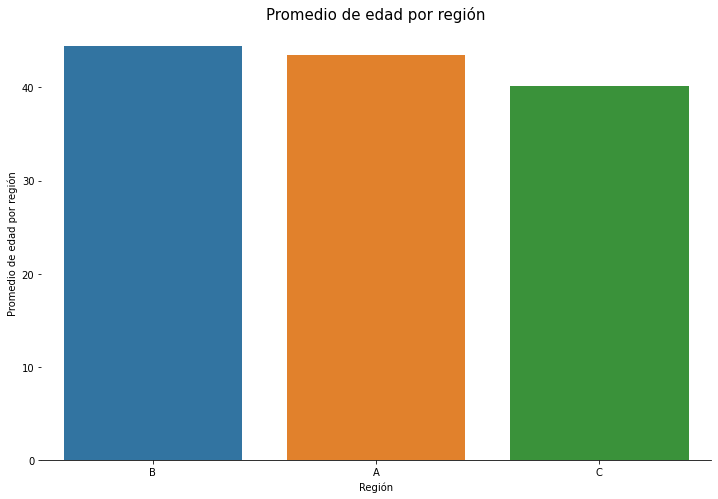

In [ ]:
#Visualizar el promedio de edad
plt.figure(figsize=(12,8))
sn.barplot(data=data, x='region18', y='edad18', ci=False)
plt.ylabel('Promedio de edad por región')
plt.xlabel('Región')
plt.title('Promedio de edad por región', size=15)
sn.despine(left=True)

**Mediana**

In [ ]:
np.percentile(data.edad18, 50) # Buscamos la mediana como el percentil 50

41.0

La mediana es de 41 años. La mitad de los clientes tienen 41 años o menos.

**Modo**

In [ ]:
stat.mode(data['edad18'])


41

El valor más frecuente de la edad de los clientes es 41 años.

In [ ]:
stat.mode(data['region18'])

'B'

El valor más frecuente de la región es B.



**Medidas de posición no centrales**


**Cuartiles**

In [ ]:
#sCuartiles con numpy para una variable
print( "q1:", np.quantile(data.edad18, 0.25))
print( "q2:", np.quantile(data.edad18, 0.50))
print( "q3:", np.quantile(data.edad18, 0.75))
# EL 75% DE LOS CLIENTES TIENEN HASTA 53,75 AÑOS


q1: 32.0
q2: 41.0
q3: 53.75


In [ ]:
#usando pandas
data['edad18'].quantile(0.25)


32.0

In [ ]:
#usando pandas
data['edad18'].quantile(0.50)


41.0

In [ ]:
#usando pandas
data['edad18'].quantile(0.75)

53.75

El 25% de los clientes tienen 32 años o menos (cuartil 1). Es decir, 32 años es el valor máximo de la edad para el 25% más joven y el valor mínimo de la edad para el 75% de edades más altas.  El 75% de los clientes tiene como máximo 53,75 años (cuartil 3).Es decir, 53 años es el valor máximo de la edad para el 75% más joven y el valor mínimo de la edad para el 25% de edades más altas.




**Percentiles**

In [ ]:
np.percentile(data.edad18, 50)

#si quiero pedir los cuantiles con numpy para una variable
# EL 10% DE LOS CLIENTES TIENEN HASTA 24 AÑOS
# EL 20% DE LOS CLIENTES TIENEN HASTA 32 AÑOS
print( "perc1:", np.percentile(data.edad18, 10))
print( "perc2:", np.percentile(data.edad18, 20))
print( "perc3:", np.percentile(data.edad18, 30))
print( "perc4:", np.percentile(data.edad18, 40))
print( "perc5:", np.percentile(data.edad18, 50))
print( "perc6:", np.percentile(data.edad18, 60))
print( "perc7:", np.percentile(data.edad18, 70))
print( "perc8:", np.percentile(data.edad18, 80))
print( "perc9:", np.percentile(data.edad18, 90))
print( "perc10:", np.percentile(data.edad18, 100))



perc1: 24.0
perc2: 32.0
perc3: 32.0
perc4: 40.60000000000001
perc5: 41.0
perc6: 45.0
perc7: 49.0
perc8: 62.0
perc9: 70.0
perc10: 78.0


El 10% de los clientes tiene 24 años o menos (percentil 1). El 80% de los clientes tiene 62 años o menos (percentil 8)

**Medidas de dispersión**

**Varianza, desviación estándar y coeficiente de variación`**

In [ ]:
print( "La varianza es", data['edad18'].var())
print( "La desv. estandar es" ,data['edad18'].std())
print("El coef. de variación es", data['edad18'].std()/data['edad18'].mean())

La varianza es 221.5428273092369
La desv. estandar es 14.884314808187742
El coef. de variación es 0.3397314618868744


Los datos de la edad se desvían en promedio 14,88 años respecto a la media de 43,81. La mayor parte de los datos se concentra en (43,81-14,88 y 43,81+14,88) = (28,93 y 58,69)años. La desviación estándar es un 34% de la media (CV).

**Rango y Rango Intercuartilico`**

In [ ]:
print("El Rango es", data['edad18'].max()-data['edad18'].min())
print("El Rango Intercuartilico es", np.quantile(data.edad18, 0.75)-np.quantile(data.edad18, 0.25))

El Rango es 60
El Rango Intercuartilico es 21.75


El rango de edades es de 60 años. La dispersión en el 50% central de los datos es de 21,75 años.

**BoxPlot`**

<function matplotlib.pyplot.show>

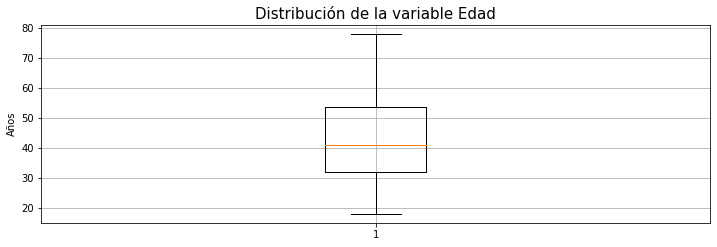

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(2, 1, 1)
plt.boxplot(data=data, x='edad18')
plt.ylabel('Años')
plt.title('Distribución de la variable Edad',size='15')
plt.grid(True)
plt.show





La mediana está más cerca del cuartil 1 y el brazo inferior es más corto, lo que estaría indicando una mayor concentración para valores más bajos de la variable. No se observan valores atípicos (outliers).

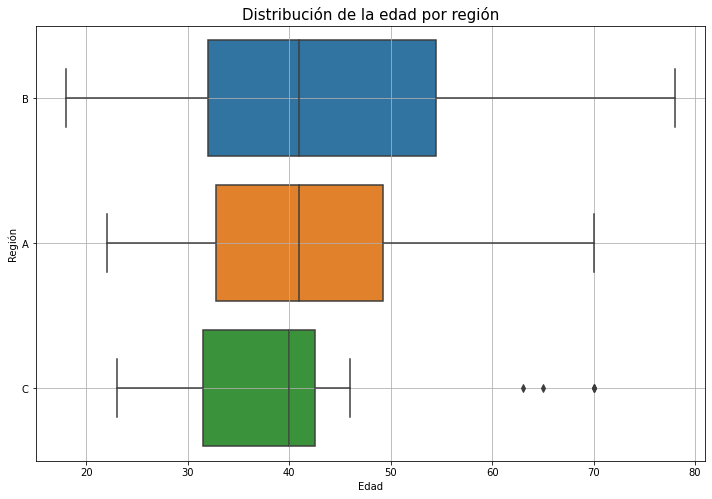

In [ ]:
# Se puede observar  la distribucion de la edad para una variable categorica (región)

plt.figure(figsize=(12,8))
sn.boxplot(x='edad18', y='region18', data=data)
plt.title("Distribución de la edad por región",size='15')
plt.xlabel("Edad")
plt.ylabel("Región")
plt.grid(True)
plt.show()



En la región B se observa mayor dispersión en el total de los datos (largo de los brazos) y en el 50% central (tamaño de la caja). Las medianas son similares en las tres zonas pero la zona C registra valores de edad atípicos altos.

In [ ]:

# Medidas descriptivas centrales para todas las variables
data.describe()

,id,rent17,online17,edad18,ing18,ant18,rent18,online18,prod18
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000
mean,125.500000,106.292000,0.124000,43.812000,66336.058760,9.57328,132.336000,0.480000,2.116000
std,72.312977,239.009096,0.330243,14.884315,35898.668677,8.55139,296.370764,0.500602,1.100631
min,1.000000,-213.000000,0.000000,18.000000,1034.730000,0.16000,-189.000000,0.000000,1.000000
25%,63.250000,-33.750000,0.000000,32.000000,38861.025000,3.75000,-26.750000,0.000000,1.000000
50%,125.500000,10.500000,0.000000,41.000000,64629.485000,6.37000,30.000000,0.000000,2.000000
75%,187.750000,187.500000,0.000000,53.750000,90356.502500,13.56000,184.500000,1.000000,3.000000
max,250.000000,1517.000000,1.000000,78.000000,178999.740000,41.16000,2726.000000,1.000000,6.000000


# Intervalos de confianza

Trabajaremos con la variable antigüedad de la base de datos. Primero realizamos un análisis exploratorio

In [ ]:
#Cambiamos el formato de la variable antigüedad a continua

data['ant18'] = data['ant18'].astype('int64')
data['ant18'].dtype


dtype('int64')

In [ ]:
#Verificamos el cambio
data.dtypes #filas, columnas

id            int64
rent17        int64
online17      int64
edad18        int64
ing18       float64
ant18         int64
rent18        int64
online18      int64
prod18        int64
region18     object
dtype: object

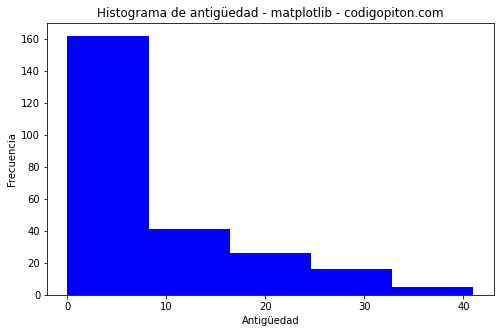

In [ ]:
plt.figure(figsize=(8,5))
intervalos = range(min(data.ant18), max(data.ant18) + 2) #calculamos los extremos de los intervalos
plt.hist(data=data, x='ant18', bins=5, color='blue', rwidth=1) #bins indica el número de barras y rwidth el ancho de la barra en porcentaje.
plt.title('Histograma de antigüedad - matplotlib - codigopiton.com')
plt.xlabel('Antigüedad')
plt.ylabel('Frecuencia')
plt.xticks()
plt.show()

No es razonable suponer que los datos de antigüedad siguen una distribución Normal. No obstante la muestra es grande por lo que puede aproximarse a Normal

**Intervalo de confianza para la media poblacional**

Se desea estimar la la antigüead promedio (en años) de los clientes en el año 2018. Tenemos una muestra  aleatoria de 250 clientes. Trabajaremos con una confianza del 95%. No conocemos la varianza poblacional, la estimaremos con los datos de la muestra.

In [ ]:
# Nivel de confianza
nivel_conf=0.95
# Datos muestrales
data=data['ant18']
from scipy.stats import t

def ic(data,nivel_conf):
    n = len(data)
    t1 = t.ppf((1-nivel_conf)/2, n-1)
    t2 = t.ppf(nivel_conf+(1-nivel_conf)/2, n-1)
    data_mean = np.mean(data)
    sigma = stdev( data, data_mean)
    lim_inf=data_mean+t1*sigma/n**0.5
    lim_sup=data_mean+t2*sigma/n**0.5
    return lim_inf,lim_sup,t1,t2,data_mean,sigma,n

lim_inf,lim_sup,t1,t2,data_mean,sigma,n = ic(data,nivel_conf)
print("Media Muestral =",data_mean)
print("S Muestral =",sigma)
print("n muestral =",n)
print("t1 =", t1)
print("t2 =", t2)
print("Intervalo de confianza: ","[",lim_inf,";",lim_sup,"]")

Media Muestral = 9.573279999999999
S Muestral = 8.551390340090574
n muestral = 250
t1 = -1.9695368676395824
t2 = 1.9695368676395824
Intervalo de confianza:  [ 8.508080776255138 ; 10.63847922374486 ]


La estimación puntual de la media poblacional de la antigüedad es la media de la muestra 9,57 años. El intervalo obtenido para un 95% de confianza es (8,51 ; 10,64). Existe una confianza del 95%  que la verdadera media poblacional de la antigüedad se encuentre en el intervalo construido.

**Intervalo de confianza para la varianza y desviación estándar poblacional**


In [ ]:
# Intervalo de confianza para la varianza
#Nivel de confianza
nivel_conf=0.95
# Datos muestrales
data=data['ant18']

def ic(data,nivel_conf):
    n = len(data)
    chi_1 = st.chi2.ppf(nivel_conf+(1-nivel_conf)/2,n-1)
    chi_2 = st.chi2.ppf(1-(nivel_conf+(1-nivel_conf)/2),n-1)
    data_mean = np.mean(data)
    data_sd = stdev( data, data_mean )
    var=data_sd**2
    lim_inf=(n-1)*var/chi_1
    lim_sup=(n-1)*var/chi_2
    return lim_inf,lim_sup,data_mean,var,n

lim_inf,lim_sup,data_mean,var,n = ic(data,nivel_conf)
print("Media Muestral =",data_mean)
print("Varianza Muestral =",var)
print("n Muestral")
print("Intervalo de confianza: ","[",lim_inf,";",lim_sup,"]")


Media Muestral = 9.136
Varianza Muestral = 73.52359839357432
n Muestral
Intervalo de confianza:  [ 62.14299015837761 ; 88.36220481070514 ]


In [ ]:
#Intervalo de confianza para la desviación estándar
print("Intervalo de confianza para la desviaciòn estandar es:","[", np.sqrt(lim_inf),";",np.sqrt(lim_sup),"]")

Intervalo de confianza para la desviaciòn estandar es: [ 7.883082528958935 ; 9.400117276433583 ]


Existe una confianza del 95% de que la desviación estándar poblacional de la antigüedad se encuentre en el intervalo (7,88 ; 9,40).

**Intervalo de confianza para la proporción poblacional**

Se desea determinar la proporción de clientes que usó servicios en línea en el 2018 (1= usa banca online; 0=no usa banca online)


In [ ]:
#Calculo el desvío estándar de la proporción
data_p = data[data.online18 == 1].online18.count()/len(data['online18'])
n = len(data)
sigma =((data_p*(1-data_p))/n)**0.5
sigma

0.0315974682530104

In [ ]:
# Nivel de confianza
nivel_conf=0.95
# proporcion
p=data[data.online18 == 1].online18.count()/len(data['online18'])
# Datos muestrales
data1=data['online18']

def ic(data1,p,nivel_conf):
    n = len(data)
    z1 = st.norm.ppf((1-nivel_conf)/2)
    z2 = st.norm.ppf(nivel_conf+(1-nivel_conf)/2)
    data_p = data[data.online18 == 1].online18.count()/len(data['online18'])
    sigma =((data_p*(1-data_p))/n)**0.5
    lim_inf=p+(z1*sigma)
    lim_sup=p+(z2*sigma)
    return lim_inf,lim_sup,z1, z2, data_p,n

lim_inf,lim_sup,z1,z2,data_p,n = ic(data,p,nivel_conf)
print("Prop Muestral =",data_p)
print("n muestral =",n)
print("z1 =", z1)
print("z2 =", z2)
print("Intervalo de confianza: ","[",lim_inf,";",lim_sup,"]")

Prop Muestral = 0.48
n muestral = 250
z1 = -1.959963984540054
z2 = 1.959963984540054
Intervalo de confianza:  [ 0.41807010022145186 ; 0.5419298997785481 ]


Existe una confianza del 95% de que la veradera proporción de clientes que usan banca on line se encuentre en el intervalo (0,42 ; 0,54).